In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm
import skimage.color as skl
from skimage import io

#### Load the figure to reproduce (used with permission)

Figure 1 from: 

Froner, B., Purves, Steve, Lowell, J., and Henderson, J. (2013). 
Perception of visual information: The role of colour in seismic interpretation. 
First Break. 31. 
10.3997/1365-2397.2013010. 

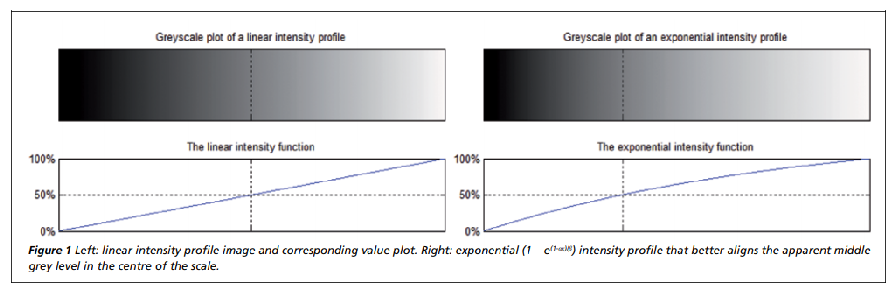

In [2]:
froner_et_al=io.imread('Froner_et_al_Figure_1.png')
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(froner_et_al);


#### Helper functions

## need to rework all these (except for expo)
## so they are like sigmoid app
## one function makes the RGB array
## the other the segmented cmao

In [3]:
def expo(x,a,b):
    """makes an exponential curve with parameters a and b"""
    y = np.array(1-(np.exp(1-(a*x))/b))
    return 100.0*(y-min(y))/(max(y)-min(y)) 

def rgb_cmap(y):
    """makes an RGB exponential grayscale LinearSegmentedColormap"""
    lexp256 = np.tile(y, (256,1))
    aexp256 = np.zeros((256,256))
    bexp256 = np.zeros((256,256))
    lab_exp256 = np.array(list(zip(lexp256, aexp256, bexp256)))
    lab_exponential256 = np.swapaxes(lab_exp256,1,2)
    rgb_exponential256 = skl.lab2rgb(lab_exponential256)

    l_exp = lab_exponential256[0,:,0]
    r_exp = rgb_exponential256[0,:,0]
    g_exp = rgb_exponential256[0,:,1]
    b_exp = rgb_exponential256[0,:,2]

    # sample 256 not perfectly 1. Normalizing y to [0-1]
    normr_exp=(r_exp-min(r_exp))/(max(r_exp)-min(r_exp))
    normg_exp=(g_exp-min(g_exp))/(max(g_exp)-min(g_exp))
    normb_exp=(b_exp-min(b_exp))/(max(b_exp)-min(b_exp))
    
    b3=normb_exp # value of blue at sample n
    b2=normb_exp # value of blue at sample n
    b1=np.linspace(0,1,len(b2)) # position of sample n - ranges from 0 to 1

    g3=normg_exp 
    g2=normg_exp
    g1=np.linspace(0,1,len(g2))

    r3=normr_exp 
    r2=normr_exp
    r1=np.linspace(0,1,len(r2))

    # creating lists
    r=zip(r1,r2,r3)
    g=zip(g1,g2,g3)
    b=zip(b1,b2,b3)

    # transposing
    rgb_=zip(r,g,b)
    rgb=zip(*rgb_)
    #print rgb

    #creating dictionary
    k=['red', 'green', 'blue'] 
    exponential_gray=dict(zip(k,rgb)) # makes a dictionary from 2 lists
    my_exp_cmap = clr.LinearSegmentedColormap('my_colormap', exponential_gray)
    return my_exp_cmap

#### Make colormap

In [4]:
x = np.linspace(0,255,256)
y1 = expo(x,0.005,2.5)

In [5]:
my_exp_cmap = rgb_cmap(y1)

#### FIND INDEX OF ELEMENT IN ARRAY CLOSEST TO SPECIFIED VALUE
http://www.scicoder.org/2011/12/getting-the-index-of-an-item-in-a-list/

To plot gridline where on x asix function intersects 50% on y axis

In [6]:
# finding index
idx = np.searchsorted(y1, 50, side="right").astype(int) # first index where value > 0.5

In [7]:
y_ticks=[0, 20, 40, 50, 60, 80, 100]
x_ticks = [0, 50, 100, 150, 250]
x_ticks.append(idx)
x_ticks=sorted(x_ticks)

In [8]:
x = np.arange(256)

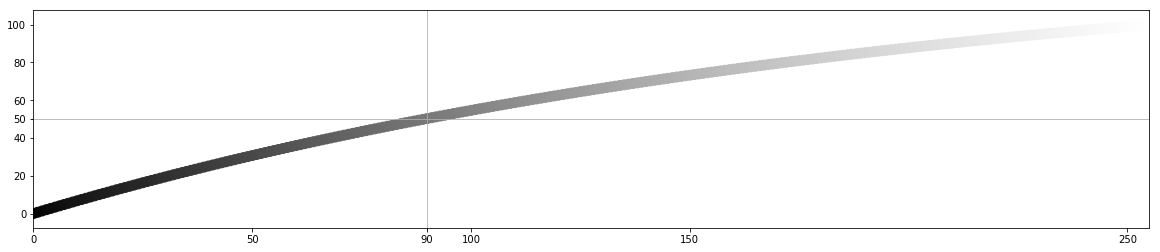

In [9]:
fig, ax = plt.subplots(figsize=(20,4))
plt.yticks(np.array(y_ticks), y_ticks)
plt.xticks(np.array(x_ticks), x_ticks)
plt.scatter(x,y1, s = 100, c = my_exp_cmap(x))
ax.set_yticks([50], minor=True)
ax.yaxis.grid(True, which='minor')
ax.set_xticks([idx], minor=True)
ax.xaxis.grid(True, which='minor')
plt.xlim(min(x),max(x));

NameError: name 'rgb_exponential256' is not defined

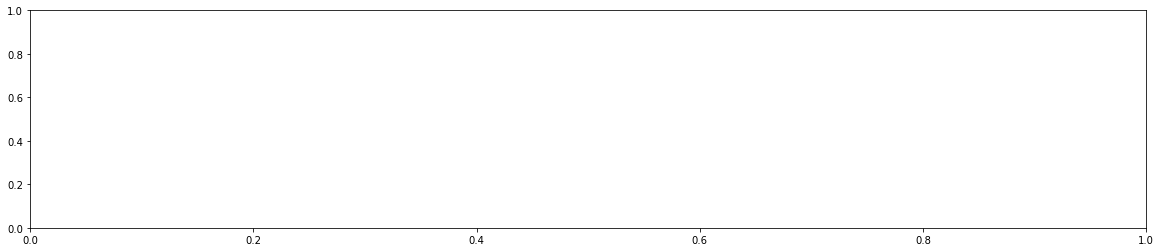

In [10]:
fig, ax = plt.subplots(figsize=(20,4))
plt.imshow(rgb_exponential256, aspect=0.18)
plt.plot([idx,idx], [0,255], '--k')
ax.set_xticks(x_ticks);
ax.tick_params(axis='y', color='w', labelcolor='white');

In [ ]:
bw1=cm.gray(np.arange(256))
# slicing to remove alpha
bw=bw1[:,:-1]

In [ ]:
rbw = np.tile(bw[:,0], (256,1))
gbw = np.tile(bw[:,1], (256,1))
bbw = np.tile(bw[:,2], (256,1))
rbw.shape

In [ ]:
rgb_bw=np.swapaxes(np.array(list(zip(rbw, gbw, bbw))),1,2)
rgb_bw.shape

In [ ]:
lab_bw = skl.rgb2lab(rgb_bw)
lab_bw.shape

In [ ]:
l_bw = lab_bw[0,:,0]

In [ ]:
# finding index
idx1 = np.searchsorted(l_bw, 50, side="right") # first index where value > 0.5

In [ ]:
idx1

In [ ]:
y_ticks1=[0, 20, 40, 50, 60, 80, 100]
x_ticks1 = [0, 50, 100, 150, 250]
x_ticks1.append(idx1)
x_ticks1=sorted(x_ticks1)

In [ ]:
fig, ax = plt.subplots(figsize=(20,4))
plt.yticks(np.array(y_ticks1), y_ticks1)
plt.xticks(np.array(x_ticks1), x_ticks1)
plt.scatter(x,l_bw, s = 100, c = 'gray')
ax.set_yticks([50], minor=True)
ax.yaxis.grid(True, which='minor')
ax.set_xticks([idx1], minor=True)
ax.xaxis.grid(True, which='minor')
plt.xlim(min(x),max(x));

In [ ]:
fig, ax = plt.subplots(figsize=(20,4))
plt.imshow(rgb_bw, aspect=0.18)
plt.plot([idx1,idx1], [0,255], '--k')
ax.set_xticks(x_ticks1);
ax.tick_params(axis='y', color='w', labelcolor='white');

In [ ]:
x_ticks

In [ ]:
# plot everything
fig = plt.figure(figsize=(20,6))
  
ax0 = plt.subplot2grid((2,2), (1,0))
ax0.scatter(x,l_bw, s = 100, c = 'gray')
ax0.set_yticks([50], minor=True)
ax0.yaxis.grid(True, which='minor')
ax0.set_yticks([0, 25, 50, 75, 100])
ax0.set_yticklabels([0, 25, 50, 75, 100])
ax0.set_xticks([idx1], minor=True)
ax0.xaxis.grid(True, which='minor')
locx1 = list(ax0.xaxis.get_ticklocs())
locx1.append(idx1)
ax0.set_xticks(locx1)
ax0.set_xlim(min(x),max(x))


ax1 = plt.subplot2grid((2,2), (0,0))
ax1.imshow(rgb_bw, aspect=0.27)
ax1.plot([idx1,idx1], [0,255], '--k')
ax1.set_xticks(x_ticks1);
ax1.tick_params(axis='y', color='w', labelcolor='white')

ax2 = plt.subplot2grid((2,2), (1,1))
ax2.scatter(x,l_exp, s = 100, c = my_exp_cmap(x))
ax2.set_yticks([50], minor=True)
ax2.yaxis.grid(True, which='minor')
ax2.set_yticks([0, 25, 50, 75, 100])
ax2.set_yticklabels([0, 25, 50, 75, 100])
ax2.set_xticks([idx], minor=True)
ax2.xaxis.grid(True, which='minor')
locx = list(ax2.xaxis.get_ticklocs())
locx.append(idx)
ax2.set_xticks(locx)
ax2.set_xlim(min(x),max(x))

ax3 = plt.subplot2grid((2,2), (0,1))
ax3.imshow(rgb_exponential256, aspect=0.27)
ax3.plot([idx,idx], [0,255], '--k')
ax3.set_xticks(x_ticks);
ax3.tick_params(axis='y', color='w', labelcolor='white')

plt.tight_layout();

Now make it interactive

Now I compare them on a timeslice

In [ ]:
data=np.load('stuff_for_exponential_grayscale/F3_dip_steered_med_IL230-43_XL475-675_T1660.npy')
data.shape

In [ ]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(data, cmap = my_exp_cmap)
plt.colorbar()
ax.set_xticks([])
ax.set_yticks([])

ax1 = fig.add_subplot(1, 2, 2)
plt.imshow(data, cmap = 'gray')
plt.colorbar()
ax1.set_xticks([])
ax1.set_yticks([]);

Export exponential grayscale

In [ ]:
#save_rgb_exponential = np.array(list(zip(normr_exp, normg_exp, normb_exp)))

In [ ]:
# export it to text file
#np.savetxt('rgb_exponential_grays.txt',save_rgb_exponential,delimiter=',', fmt='%1.5f')